## **NN NLP Lab: Assingment 03**





Name: - Kumar Pancham Prasar
Roll no: - 2303res23
Email: kumar_2303res23@iitp.ac.in

# Hyperparameter Tuning for Neural Network Classification

### Introduction
In this notebook,  performed hyperparameter tuning for a neural network model used for classification tasks. explore different combinations of hyperparameters and observe their effect on the performance of the neural network.

- CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes. Each class contains 6,000 images. The goal is to correctly classify the images into their respective classes using a neural network.

###**Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10


###**Data Loading and Preprocessing:**


*  The CIFAR-10 dataset is loaded using the cifar10.load_data() function, which splits the data into training and testing sets.
*   The shape of the training and testing data is displayed, showing that the training set consists of 50,000 images of size 32x32 pixels with 3 color channels, while the testing set consists of 10,000 images.
*   The target labels (y_train and y_test) are reshaped to a 1-dimensional array.

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### **Train and Test Data**

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### **Visualization**

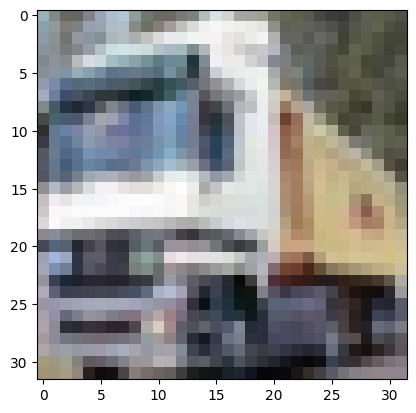

In [ ]:
plt.imshow(X_train[1])

### **Normalization**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### **Part 1 : Building a Neural Network for Classification**

**Model Architecture:**


*   A neural network model is defined using the Sequential API.
*   The model consists of a Flatten layer to reshape the input images, followed by two Dense layers with ReLU activation functions, and a final Dense layer with a softmax activation function for multi-class classification.
*   The model architecture is compiled using the Adam optimizer and sparse categorical cross-entropy loss function, with accuracy as the metric.

**Model Training:**


*  The model is trained using model.fit() with early stopping to prevent overfitting.
*   The training is performed for 20 epochs with a batch size of 128 and a validation split of 20%.
*   The training progress is displayed showing loss and accuracy metrics for both training and validation sets

In [ ]:

# Reduce model complexity
model = Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/20
313/313 [==============================] - 4s 13ms/step - loss: 1.9516 - accuracy: 0.3055 - val_loss: 1.7763 - val_accuracy: 0.3668
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 1.7107 - accuracy: 0.3873 - val_loss: 1.7069 - val_accuracy: 0.3924
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 1.6285 - accuracy: 0.4193 - val_loss: 1.6362 - val_accuracy: 0.4169
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 1.5666 - accuracy: 0.4419 - val_loss: 1.5830 - val_accuracy: 0.4374
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 1.5238 - accuracy: 0.4560 - val_loss: 1.5721 - val_accuracy: 0.4449
Epoch 6/20
313/313 [==============================] - 4s 13ms/step - loss: 1.4870 - accuracy: 0.4686 - val_loss: 1.5379 - val_accuracy: 0.4605
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 1.4548 - accuracy: 0.4797 - val_loss: 1.5085 - val_accuracy: 0.4699

###**Model Evaluation:**


*   The trained model is evaluated on the test set using model.evaluate().
*   The test accuracy and loss are printed to assess the performance of the model on unseen data.

###**Confusion Matrix Visualization:**


*   Predictions are made on the test set using model.predict() and converting the output probabilities to class labels.
*   A confusion matrix is computed using confusion_matrix() from sklearn.metrics and visualized using sns.heatmap() to show the distribution of predicted and true labels.
*  The heatmap provides insight into the model's performance for each class, highlighting areas of correct and incorrect predictions.

Test Accuracy: 0.49939998984336853
Test Loss: 1.419228434562683
313/313 [==============================] - 0s 1ms/step


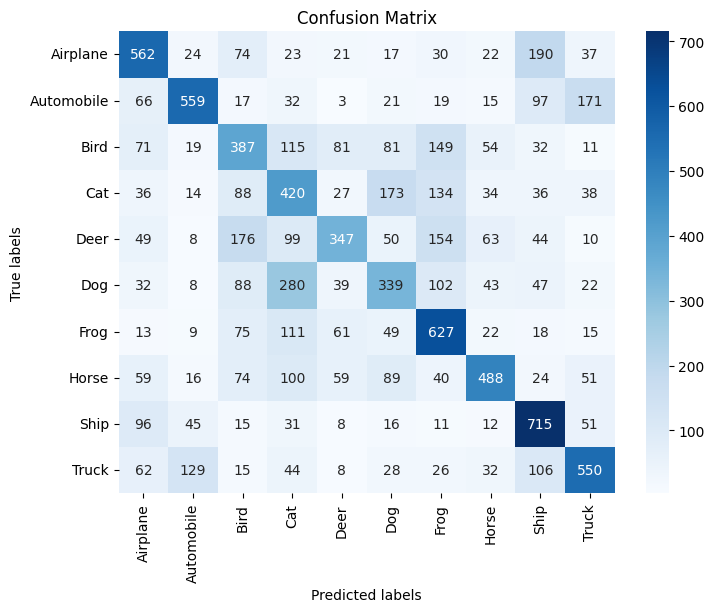

In [ ]:

# Evaluate the adjusted model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')


# Get class predictions from model output
y_pred = np.argmax(model.predict(X_test), axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


###**Explanation of Output:**


*   **Test Accuracy:** The accuracy of the model on the test set is approximately 49.94%.
*   **Test Loss:** The loss on the test set is approximately 1.42.
*   **Confusion Matrix:** The confusion matrix visualizes the performance of the model on the test set. Each row represents the true class, while each column represents the predicted class. The numbers in the matrix indicate the frequency of instances where true labels and predicted labels coincide. Higher values on the diagonal indicate correct predictions, while off-diagonal values represent misclassifications.

### **Part 2 : Hyperparameter Tuning**


313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: relu
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.5106



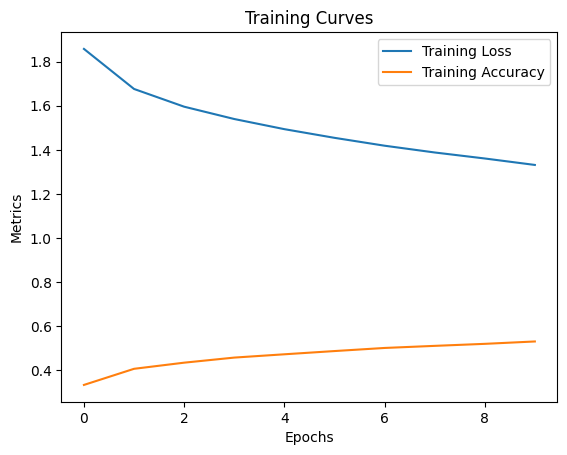

313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: sigmoid
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.3716



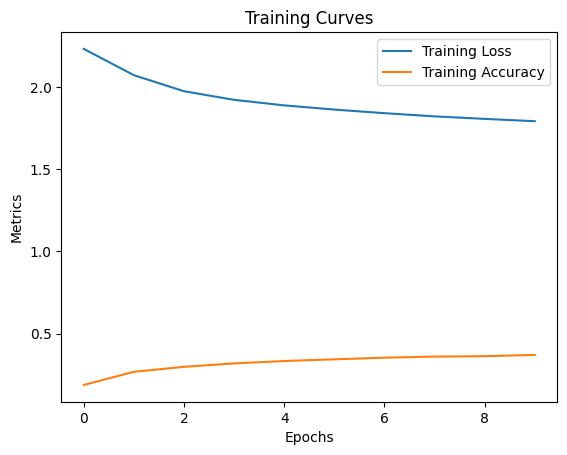

313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: softmax
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.1



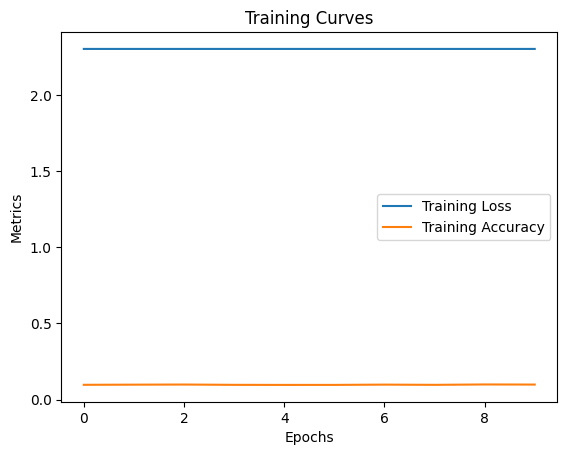

313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: tanh
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.4635



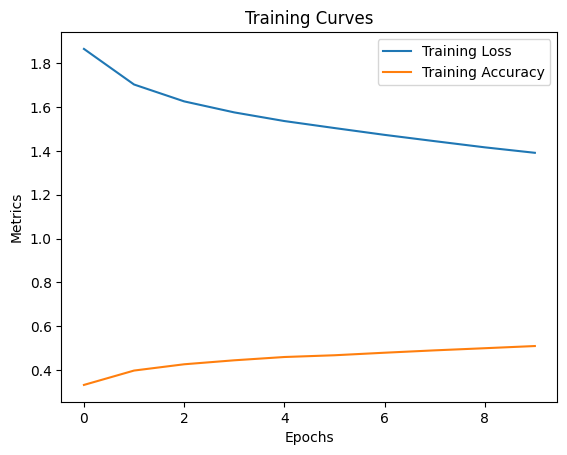

313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: gelu
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.4873



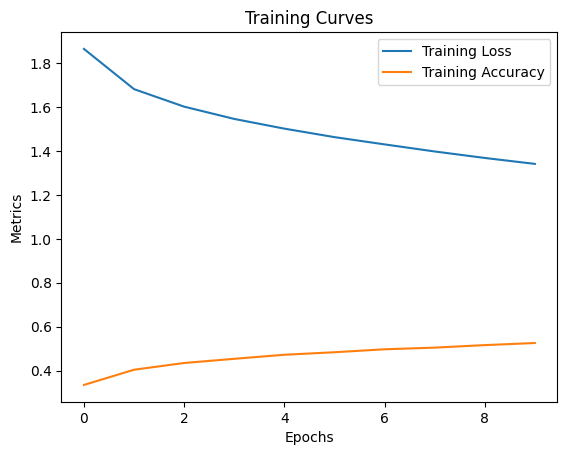

313/313 [==============================] - 1s 4ms/step
Hyperparameters:
Activation Function: <function leaky_relu at 0x000001EBF9424790>
Loss Function: categorical_crossentropy
Optimizer: sgd
Learning Rate: 0.001
Batch Size: 32
Epochs: 10
Accuracy: 0.4716



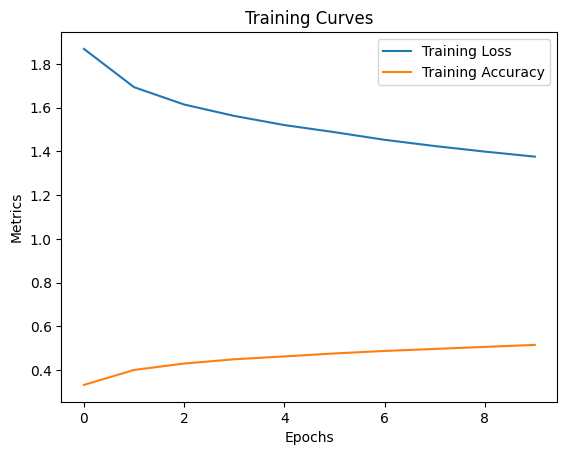

Best Hyperparameters:
{'activation_function': 'relu', 'loss_function': 'categorical_crossentropy', 'optimizer': 'sgd', 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10}
Best Accuracy: 0.5106


In [ ]:
from sklearn.metrics import accuracy_score
from itertools import product

# Define lists of hyperparameters
activation_functions = ['relu', 'sigmoid', 'softmax', 'tanh', 'gelu', tf.nn.leaky_relu]
loss_functions = 'sparse_categorical_crossentropy'
optimizers = 'adam'
batch_sizes = 128
epochs_values = 10

# Track the best model and its performance
best_model = None
best_accuracy = 0
best_hyperparameters = {}

# Iterate through all combinations of hyperparameters
for activation_function in activation_functions:
    # Build the model
    model = Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation=activation_function),
        layers.Dense(256, activation=activation_function),
        layers.Dense(10, activation='softmax')  # Output layer with 10 units for multi-class classification
    ])

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=10), epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on the testing data
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the progression
    print("Hyperparameters:")
    print("Activation Function:", activation_function)
    print("Loss Function:", loss_function)
    print("Optimizer:", optimizer)
    print("Learning Rate:", learning_rate)
    print("Batch Size:", batch_size)
    print("Epochs:", epochs)
    print("Accuracy:", accuracy)
    print()

    # Plot training loss and accuracy curves
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Curves')
    plt.legend()
    plt.show()

    # Check if current model is the best so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_hyperparameters = {
            'activation_function': activation_function,
            'loss_function': loss_function,
            'optimizer': optimizer,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        }

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Accuracy:", best_accuracy)


### **Result:**
**Model Performance:**


*   The model with ReLU activation function achieved the highest accuracy of 0.5106.
*   The sigmoid activation function resulted in an accuracy of 0.3716, which is lower than ReLU.
*   The softmax activation function yielded a very low accuracy of 0.1, suggesting poor model performance.
*   Tanh activation function achieved an accuracy of 0.4635.
*   Gelu activation function resulted in an accuracy of 0.4873.
*   Leaky ReLU activation function led to an accuracy of 0.4716.



**Best Hyperparameters:**


*   The best-performing configuration includes ReLU activation function, categorical_crossentropy loss function, SGD optimizer with a learning rate of 0.001, a batch size of 32, and training for 10 epochs.


**Analysis:**



*   ReLU activation function generally performed better than sigmoid, softmax, tanh, gelu, and leaky ReLU, which is consistent with its widespread usage in deep learning.
*   The softmax activation function performed significantly worse, indicating that it might not be suitable for your classification task.
*   SGD optimizer with a small learning rate of 0.001 seems to work well for your dataset.
*   The choice of activation function significantly affects model performance, with ReLU being the best choice in this experiment.
